In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
arr = np.load('/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_1.0/test/13284.npz')

In [12]:
arr.files

['atom_pos', 'atomic_numbers', 'x_pos', 'y_pos', 'frequencies', 'spectrums']

In [19]:
xyz = arr['atom_pos']
xyz.shape

(34, 3)

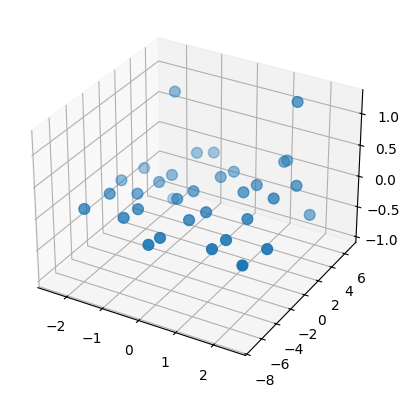

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=60)

plt.show()

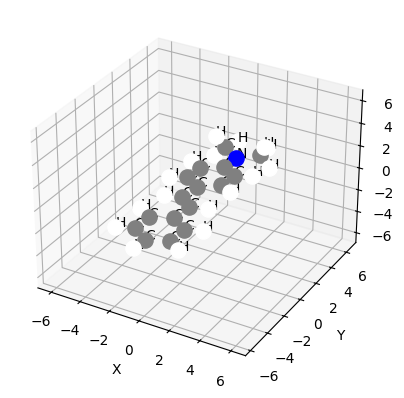

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.load('/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_1.0/test/13284.npz')
# Example: using your data
atom_pos = np.array(data['atom_pos'])          # Nx3 array
atomic_numbers = np.array(data['atomic_numbers'])

# Simple mapping from atomic number → symbol (minimal)
symbol_map = {1:'H', 6:'C', 7:'N', 8:'O', 16:'S'}
symbols = [symbol_map.get(z, str(z)) for z in atomic_numbers]

# Simple colors
color_map = {1:'white', 6:'gray', 7:'blue', 8:'red', 16:'yellow'}
colors = [color_map.get(z, 'green') for z in atomic_numbers]

# Plot atoms
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for pos, col, sym in zip(atom_pos, colors, symbols):
    x, y, z = pos
    ax.scatter(x, y, z, color=col, s=120)
    ax.text(x, y, z, sym, fontsize=10, color='black')

# Equal aspect ratio
max_range = (atom_pos.max(axis=0) - atom_pos.min(axis=0)).max() / 2
mid = atom_pos.mean(axis=0)
ax.set_xlim(mid[0]-max_range, mid[0]+max_range)
ax.set_ylim(mid[1]-max_range, mid[1]+max_range)
ax.set_zlim(mid[2]-max_range, mid[2]+max_range)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [42]:
z_max

np.float64(1.2183686830666827)

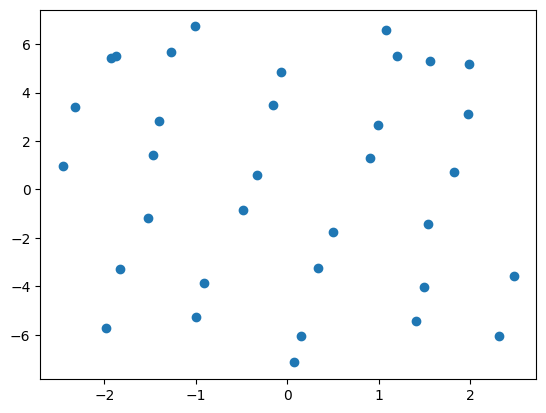

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def add_disk(image, center, radius):
    rows, cols = np.ogrid[:image.shape[0], :image.shape[1]]
    mask = (rows - center[0])**2 + (cols - center[1])**2 <= radius**2
    image[mask] = 1


def molecule_circular_image_from_arrays(atom_pos, atomic_numbers,
                                        flag=True, circle_radius=5):
    """
    Create a circular-disk image from atom positions and atomic numbers.

    Parameters:
        atom_pos: (N, 3) array of xyz coordinates
        atomic_numbers: (N,) array/list of atomic numbers
        flag: True = single-channel image, False = multi-channel (H,C,N,O)
    """

    # Atomic number → symbol mapping
    atomic_map = {1:"H", 6:"C", 7:"N", 8:"O"}
    fixed_elements = ["H", "C", "N", "O"]

    # Convert to element symbols
    atoms_data = [(atomic_map.get(Z, "X"), tuple(pos))
                  for Z, pos in zip(atomic_numbers, atom_pos)]

    grid_size = 256

    positions = np.array([pos for _, pos in atoms_data])
    
    
    # Select top layer (z close to max z)
    zmax = np.max(positions[:, 2])
    ref = 1.0
    mask_top = positions[:, 2] > (zmax - ref)

    positions = positions[mask_top]
    atoms_data = [(e, pos) for (e, pos) in atoms_data] #if pos[2] > (zmax - ref)]

    # Compute centre in XY
    center_x = np.mean(positions[:, 0])
    center_y = np.mean(positions[:, 1])

    grid_physical_size = 18.0  # Å
    x_min = center_x - grid_physical_size/2
    x_max = center_x + grid_physical_size/2
    y_min = center_y - grid_physical_size/2
    y_max = center_y + grid_physical_size/2

    # Allocate image
    if flag:
        multi_channel_img = np.zeros((1, grid_size, grid_size))
    else:
        multi_channel_img = np.zeros((len(fixed_elements), grid_size, grid_size))

    # Fill the channels
    for ch, elem in enumerate(fixed_elements):
        pos = np.array([pos for e, pos in atoms_data if e == elem])
        if pos.size == 0:
            continue

        pos = pos[:, :2]

        # Convert physical → pixel coordinates
        x_idx = np.clip(((pos[:, 0] - x_min) / (x_max - x_min) * grid_size).astype(int), 0, grid_size - 1)
        y_idx = np.clip(((pos[:, 1] - y_min) / (y_max - y_min) * grid_size).astype(int), 0, grid_size - 1)


        x_idx = np.clip((((pos[:, 0] + 9)/ 18) * grid_size).astype(int), 0, grid_size - 1)
        y_idx = np.clip((((pos[:, 1] + 9)/ 18) * grid_size).astype(int), 0, grid_size - 1)


        # Draw disks
        for x, y in zip(x_idx, y_idx):
            if flag:
                ch = 0
            add_disk(multi_channel_img[ch], (y, x), circle_radius)

    return multi_channel_img


In [49]:
data = np.load('/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_1.0/test/13284.npz')

atom_pos = data['atom_pos']          # (N, 3)
atomic_numbers = data['atomic_numbers']  # (N,)

img = molecule_circular_image_from_arrays(atom_pos, atomic_numbers,
                                          flag=True, circle_radius=5)


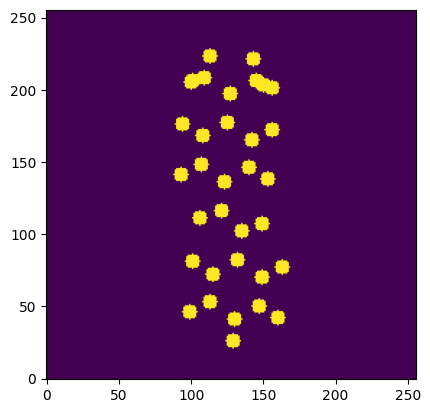

In [50]:
plt.imshow(img[0], origin='lower')

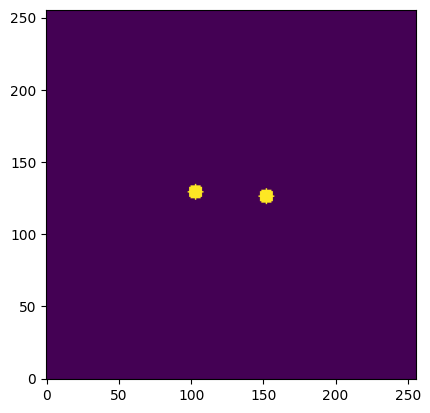

In [43]:
plt.imshow(img[0], origin='lower')

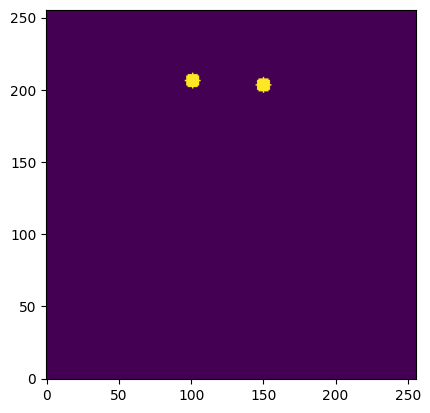

In [46]:
plt.imshow(img[0], origin='lower')

In [47]:
img1 = img

In [51]:
img2 = img

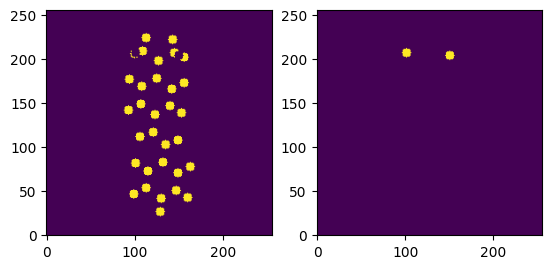

In [56]:
plt.subplot(1,2,1)
plt.imshow(img2[0] - img1[0], origin='lower')
plt.subplot(1,2,2)
plt.imshow(img1[0], origin='lower')


In [80]:
import numpy as np
import matplotlib.pyplot as plt


def left_mol(atom_pos, atomic_numbers,
                                        flag=True, circle_radius=5):
    """
    Create a circular-disk image from atom positions and atomic numbers.

    Parameters:
        atom_pos: (N, 3) array of xyz coordinates
        atomic_numbers: (N,) array/list of atomic numbers
        flag: True = single-channel image, False = multi-channel (H,C,N,O)
    """

    # Atomic number → symbol mapping
    atomic_map = {1:"H", 6:"C", 7:"N", 8:"O"}
    fixed_elements = ["H", "C", "N", "O"]

    # Convert to element symbols
    atoms_data = [(atomic_map.get(Z, "X"), tuple(pos))
                  for Z, pos in zip(atomic_numbers, atom_pos)]

    grid_size = 256

    positions = np.array([pos for _, pos in atoms_data])
    
    
    # Select top layer (z close to max z)
    zmax = np.max(positions[:, 2])
    ref = 1.0
    mask_top = positions[:, 2] > (zmax - ref)

    sum = np.sum(mask_top)

    remove = positions.shape[0] - sum

    return remove

   


In [81]:
data = np.load('/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_1.0/test/13284.npz')

atom_pos = data['atom_pos']          # (N, 3)
atomic_numbers = data['atomic_numbers']  # (N,)

print(left_mol(atom_pos, atomic_numbers,flag=True, circle_radius=5))

32


In [86]:
import numpy as np
import glob
import os

# Root directory containing all subdirectories
root = "/scratch/phys/sin/sethih1/Extended_TERS_data/planar_oct_2025/planar_again/planar_npz_0.05/"
root = '/scratch/phys/sin/sethih1/data_files/final_data_used/'

# Find all .npz files in all subdirectories
files = sorted(glob.glob(os.path.join(root, "**/*.npz"), recursive=True))

print(f"Found {len(files)} files")
removes = 0

for f in files:
    data = np.load(f)
    atom_pos = data["atom_pos"]
    atomic_numbers = data["atomic_numbers"]

    # OPTIONAL: run your function here
    # img = molecule_circular_image_from_arrays(atom_pos, atomic_numbers)

    remove = left_mol(atom_pos, atomic_numbers,flag=True, circle_radius=5)

    removes += remove

    if remove > 0:
        print(f, remove)


Found 1455 files
/scratch/phys/sin/sethih1/data_files/final_data_used/test/146530.npz 13
/scratch/phys/sin/sethih1/data_files/final_data_used/test/158898.npz 4
/scratch/phys/sin/sethih1/data_files/final_data_used/test/16807.npz 9
/scratch/phys/sin/sethih1/data_files/final_data_used/test/192724.npz 1
/scratch/phys/sin/sethih1/data_files/final_data_used/test/211058.npz 4
/scratch/phys/sin/sethih1/data_files/final_data_used/test/75421.npz 5
/scratch/phys/sin/sethih1/data_files/final_data_used/train/100698.npz 4
/scratch/phys/sin/sethih1/data_files/final_data_used/train/101509.npz 6
/scratch/phys/sin/sethih1/data_files/final_data_used/train/112837.npz 18
/scratch/phys/sin/sethih1/data_files/final_data_used/train/11296.npz 1
/scratch/phys/sin/sethih1/data_files/final_data_used/train/11318.npz 6
/scratch/phys/sin/sethih1/data_files/final_data_used/train/115143.npz 9
/scratch/phys/sin/sethih1/data_files/final_data_used/train/115167.npz 12
/scratch/phys/sin/sethih1/data_files/final_data_used/t

In [87]:
print(removes)

499
